In [2]:
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
import rdkit.Chem.Descriptors as desc
import rdkit.Chem as Chem

In [3]:
ligands = pd.read_csv('../data/fragments.csv')['smiles']
docked_df = pd.read_csv('../out/pymol/output_energies_docked_2g5r_2.csv')
avg_docked_energy = docked_df.mean(axis=1)
best_docked_energy = docked_df['0']
y = pd.read_csv('../data/test.csv')['G'][:len(docked_df)]
mol_wt = [desc.ExactMolWt(Chem.MolFromSmiles(i)) for i in ligands][:len(docked_df)]
merge_df = pd.DataFrame({'avg':avg_docked_energy, 'best':best_docked_energy, 'y':y, 'mol_wt':mol_wt})
# merge_df = merge_df[(np.abs(st.zscore(merge_df)) < 3).all(axis=1)]

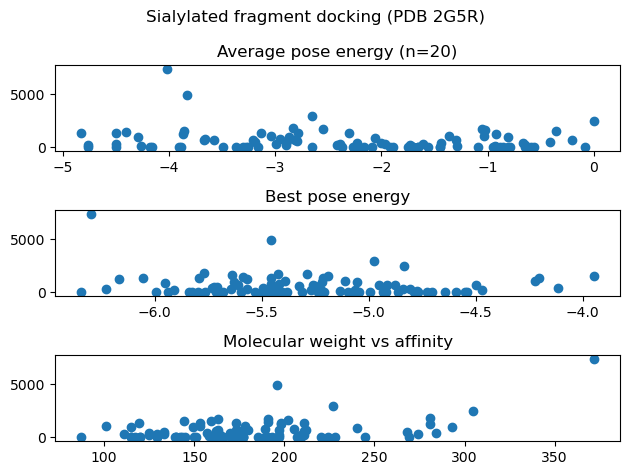

In [4]:
fig, axs = plt.subplots(3)
fig.suptitle('Sialylated fragment docking (PDB 2G5R)')
axs[0].scatter(merge_df['avg'], merge_df['y'])
axs[0].set_title("Average pose energy (n=20)")
axs[1].scatter(merge_df['best'], merge_df['y'])
axs[1].set_title("Best pose energy")
axs[2].scatter(merge_df['mol_wt'], merge_df['y'])
axs[2].set_title("Molecular weight vs affinity")
fig.tight_layout()


In [5]:
r, p = st.pearsonr(merge_df['avg'], merge_df['y'])
print(f"Average docking energy vs. experimental affinity\ncorrelation: {r}\nP-value:        {p}\nR squared:    {r**2}")

r, p = st.pearsonr(merge_df['best'], merge_df['y'])
print(f"Best docking energy vs. experimental affinity\ncorrelation: {r}\nP-value:        {p}\nR squared:    {r**2}")

r, p = st.pearsonr(merge_df['mol_wt'], merge_df['y'])
print(f"Molecular weight vs. experimental affinity\ncorrelation: {r}\nP-value:        {p}\nR squared:    {r**2}")

Average docking energy vs. experimental affinity
correlation: -0.18192969370856757
P-value:        0.07926776437284414
R squared:    0.03309841345289321
Best docking energy vs. experimental affinity
correlation: -0.14599614397908509
P-value:        0.1602945429461008
R squared:    0.021314874056761742
Molecular weight vs. experimental affinity
correlation: 0.45116881723159774
P-value:        5.0258330307152354e-06
R squared:    0.20355330164215885


In [7]:
idx_to_keep = [10, 12, 1, 22, 23, 25, 27, 29, 35, 36, 40, 46, 47, 50, 53, 55, 56, 6, 70, 72, 77, 7, 88]
merge_df_sliced = merge_df.loc[idx_to_keep]
kdeep_scores = pd.read_csv("../data/kdeep_affinities.csv")
kdeep_scores.head()

,Id,SMILES,Protein,Ligand,Heavy Atoms,Mol. weight [g/mol],Exp. Affinity,Binding probability mean,Binding probability std,dG [kcal/mol] mean,dG [kcal/mol] std,Lig. Efficiency [kcal/mol] mean,Lig. Efficiency [kcal/mol] std,Pic50 mean,Pic50 std,Pkd mean,Pkd std
0,0_lig_assembled_10_pdb,CO[C@]1(C(=O)O)C[C@H](O)[C@@H](NC(C)=O)[C@H]([...,protein.pdb,0_lig_assembled_10_pdb_processed.sdf,39,563.473,None,0.2,0.4,-6.197995,-0.509736,-0.158923,-0.013070,4.486995,0.345945,4.591108,0.377583
1,1_lig_assembled_12_pdb,CO[C@]1(C(=O)O)C[C@H](O)[C@@H](NC(C)=O)[C@H]([...,protein.pdb,1_lig_assembled_12_pdb_processed.sdf,40,567.552,None,0.2,0.4,-6.731112,-1.093223,-0.168278,-0.027331,4.986051,0.704534,4.986009,0.809794
2,2_lig_assembled_1_pdb,CO[C@]1(C(=O)O)C[C@H](O)[C@@H](NC(C)=O)[C@H]([...,protein.pdb,2_lig_assembled_1_pdb_processed.sdf,34,491.454,None,0.2,0.4,-5.426893,-0.756185,-0.159615,-0.022241,3.859130,0.662951,4.019921,0.560137
3,3_lig_assembled_22_pdb,CO[C@]1(C(=O)O)C[C@H](O)[C@@H](NC(C)=O)[C@H]([...,protein.pdb,3_lig_assembled_22_pdb_processed.sdf,37,533.491,None,0.2,0.4,-6.104495,-0.943988,-0.164986,-0.025513,4.419486,0.666921,4.521848,0.699250
4,4_lig_assembled_23_pdb,CO[C@]1(C(=O)O)C[C@H](O)[C@@H](NC(C)=O)[C@H]([...,protein.pdb,4_lig_assembled_23_pdb_processed.sdf,41,602.579,None,0.2,0.4,-8.693413,-0.690718,-0.212034,-0.016847,6.435638,0.536406,6.439565,0.511643


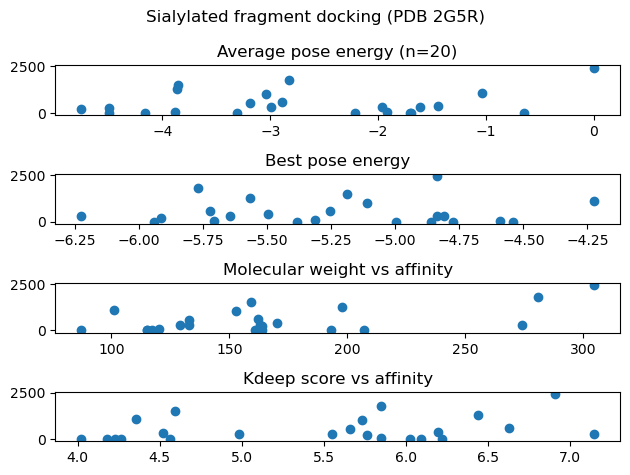

In [8]:
fig, axs = plt.subplots(4)
fig.suptitle('Sialylated fragment docking (PDB 2G5R)')
axs[0].scatter(merge_df_sliced['avg'], merge_df_sliced['y'])
axs[0].set_title("Average pose energy (n=20)")
axs[1].scatter(merge_df_sliced['best'], merge_df_sliced['y'])
axs[1].set_title("Best pose energy")
axs[2].scatter(merge_df_sliced['mol_wt'], merge_df_sliced['y'])
axs[2].set_title("Molecular weight vs affinity")
axs[3].scatter(kdeep_scores['Pkd mean'], merge_df_sliced['y'])
axs[3].set_title("Kdeep score vs affinity")
fig.tight_layout()


In [9]:
r, p = st.pearsonr(merge_df_sliced['avg'], merge_df_sliced['y'])
print(f"Average docking energy vs. experimental affinity\ncorrelation: {r}\nP-value:        {p}\nR squared:    {r**2}")

r, p = st.pearsonr(merge_df_sliced['best'], merge_df_sliced['y'])
print(f"Best docking energy vs. experimental affinity\ncorrelation: {r}\nP-value:        {p}\nR squared:    {r**2}")

r, p = st.pearsonr(merge_df_sliced['mol_wt'], merge_df_sliced['y'])
print(f"Molecular weight vs. experimental affinity\ncorrelation: {r}\nP-value:        {p}\nR squared:    {r**2}")

r, p = st.pearsonr(kdeep_scores['Pkd mean'], merge_df_sliced['y'])
print(f"Molecular weight vs. experimental affinity\ncorrelation: {r}\nP-value:        {p}\nR squared:    {r**2}")

Average docking energy vs. experimental affinity
correlation: 0.21296351181528828
P-value:        0.3292458599116442
R squared:    0.04535345736470043
Best docking energy vs. experimental affinity
correlation: 0.04773147522743902
P-value:        0.8287778341995303
R squared:    0.0022782937273876248
Molecular weight vs. experimental affinity
correlation: 0.5701746134160153
P-value:        0.004502407720597895
R squared:    0.32509908978410246
Molecular weight vs. experimental affinity
correlation: 0.3083010497115002
P-value:        0.15236001110520692
R squared:    0.09504953725321291


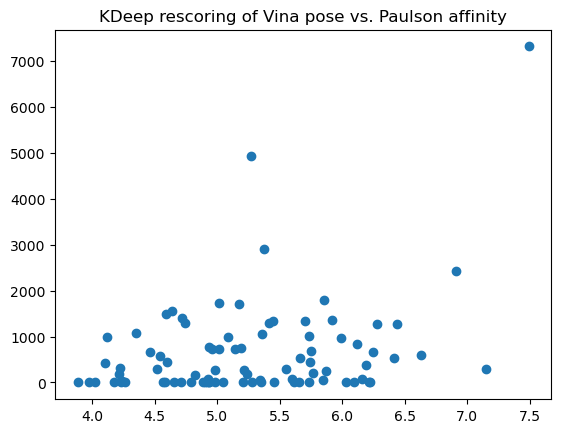

In [43]:
kdeep_remove = [45, 65, 66, 67, 68, 69, 80]
kdeep_df = pd.read_csv('../data/kdeep_out_pymol.csv')
merge_df_kdeep = merge_df.copy(deep=True)
merge_df_kdeep['id'] = [i for i in range(len(merge_df_kdeep))]
merge_df_kdeep = merge_df_kdeep.drop(kdeep_remove, axis=0)
merge_df_kdeep['kdeep_score'] = list(kdeep_df['Pkd mean'])
# merge_df_kdeep = merge_df_kdeep[(np.abs(st.zscore(merge_df_kdeep)) < 3).all(axis=1)]
plt.scatter(merge_df_kdeep['kdeep_score'], merge_df_kdeep['y'])
plt.title("KDeep rescoring of Vina pose vs. Paulson affinity")
plt.show()


In [44]:
r, p = st.pearsonr(merge_df_kdeep['kdeep_score'], merge_df_kdeep['y'])
print(f"KDeep score vs. experimental affinity\ncorrelation: {r}\nP-value:        {p}\nR squared:    {r**2}")

KDeep score vs. experimental affinity
correlation: 0.3348889708176115
P-value:        0.001521571706814866
R squared:    0.11215062277527904
